In [1]:
%matplotlib inline
import pyfolio as pf
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"
from datetime import datetime
import os

In [4]:
def calc_rets(path):
    instruments = []
    for i in os.listdir(path):
        if i.find('equitys.csv')== -1:
            continue
        instruments.append(i[:i.find('_')])
    dfs = []
    for instrument in  instruments:
        df = pd.read_csv(os.path.join(path, '%s_equitys.csv' % instrument), header=None, names=['timestamp', 'equitys', 'pnl', 'fee'])
        df['instrument']  = instrument
        df['pnl_change'] = df.equitys - df.equitys.shift(1)
        df.pnl_change = df.pnl_change.fillna(0)
        dfs.append(df)
    df = pd.concat(dfs)
    df['datetime'] = (df.timestamp/1000.0).apply(datetime.utcfromtimestamp)  
    pnl_changes = df.groupby(df.datetime.dt.date)['pnl_change'].sum()
    cumsum_pnl_changes = pnl_changes.cumsum()
    equitys = cumsum_pnl_changes + 500000
    #grp.index = pd.to_datetime(grp.index)
    return (equitys.shift(-1)/equitys - 1).dropna()



Entire data start date: 2016-12-06
Entire data end date: 2017-07-20
Backtest months: 7


,Backtest
Annual return,-42.6%
Cumulative returns,-28.4%
Annual volatility,118.4%
Sharpe ratio,0.11
Calmar ratio,-0.60
Stability,0.65
Max drawdown,-70.6%
Omega ratio,1.02
Sortino ratio,0.17
Skew,0.54


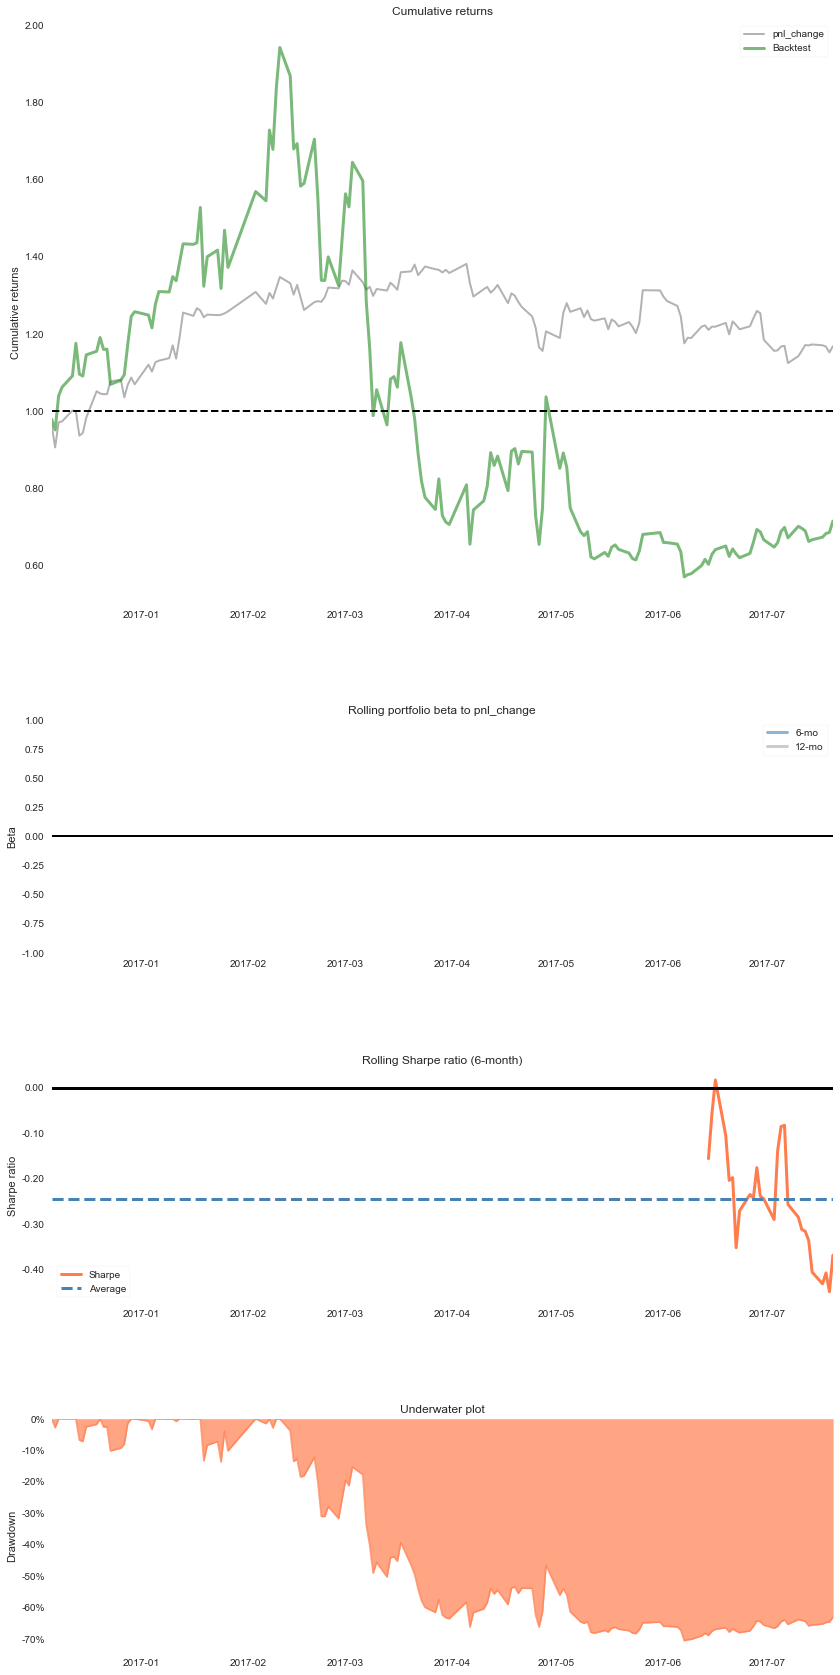

In [5]:
rets = calc_rets('C:/Users/Administrator/Desktop/Work/data/CTA_algo/backtesting/result100_1/')
benchmark_rets = calc_rets('C:/Users/Administrator/Desktop/Work/data/CTA_algo/backtesting/result0_0/')
pf.create_simple_tear_sheet(rets, benchmark_rets=benchmark_rets, live_start_date=None)

Entire data start date: 2016-12-06
Entire data end date: 2017-05-11
Backtest months: 4


,Backtest
Annual return,11.2%
Cumulative returns,4.5%
Annual volatility,6.4%
Sharpe ratio,1.69
Calmar ratio,3.59
Stability,0.42
Max drawdown,-3.1%
Omega ratio,1.52
Sortino ratio,3.66
Skew,3.56


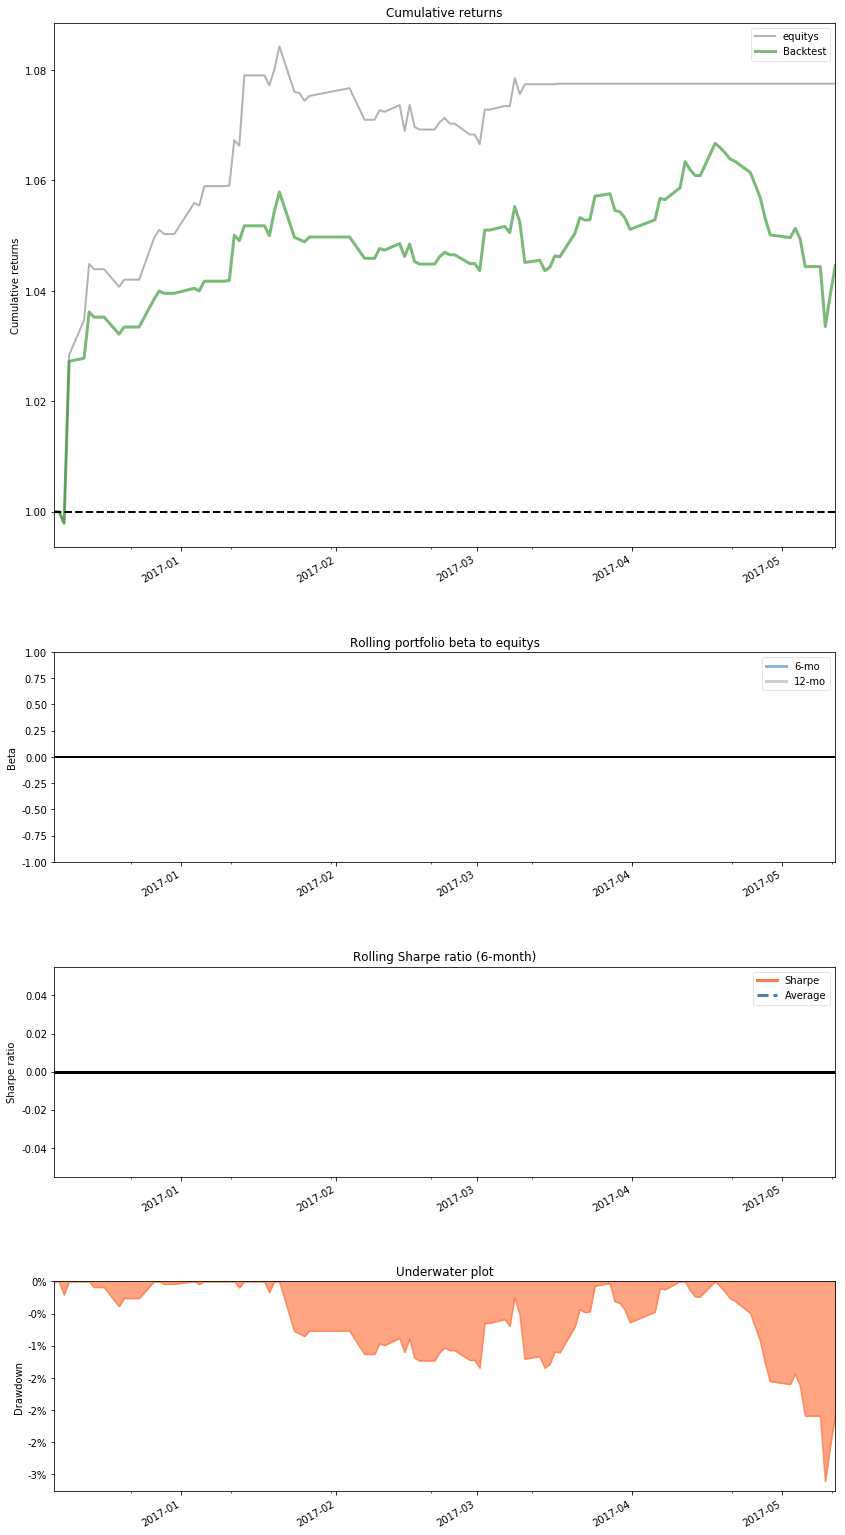

In [35]:
def calc_ret(df):
    df['date'] = (df.timestamp/1000.0).apply(datetime.utcfromtimestamp)
    df.set_index('date', inplace=True)
    return (df.equitys.shift(-1)/df.equitys - 1).dropna()

instrument = 'rb1705'
live_start_date = '2017-01-10'
df = pd.read_csv('d:/backtesting/result/%s_equitys.csv' % instrument, header=None, names=['timestamp', 'equitys', 'pnl', 'fee'])
benchmark_df = pd.read_csv('d:/backtesting/benchmark/%s_equitys.csv' % instrument, header=None, names=['timestamp', 'equitys', 'pnl', 'fee'])

rets = calc_ret(df)
benchmark_rets = calc_ret(benchmark_df)
pf.create_simple_tear_sheet(rets, benchmark_rets=benchmark_rets, live_start_date=None)
